In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# load docunet dataset & pairing 

Image: 1-d2a1c88c.png <--> Label: 1-d2a1c88c.npz


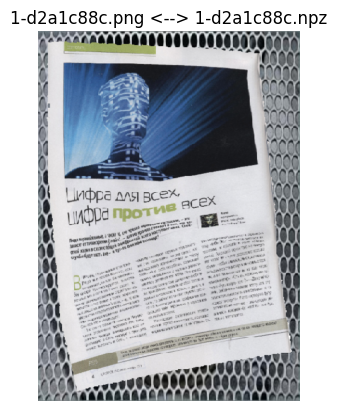

Label npz keys: ['x', 'y']
--------------------------------------------------
Image: 10-0798ae97.png <--> Label: 10-0798ae97.npz


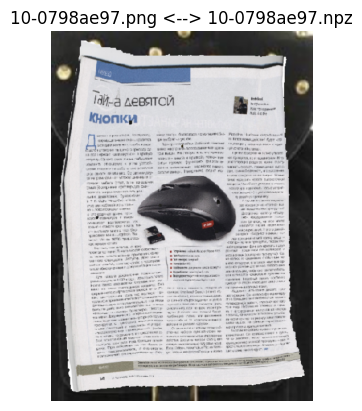

Label npz keys: ['x', 'y']
--------------------------------------------------
Image: 102-0016eccf.png <--> Label: 102-0016eccf.npz


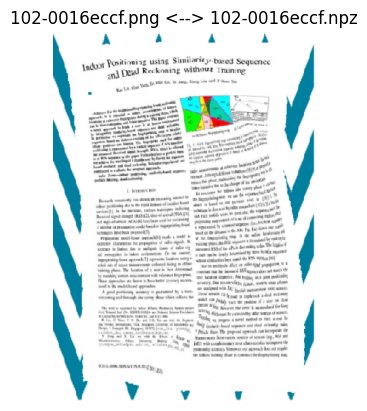

Label npz keys: ['x', 'y']
--------------------------------------------------
Image: 102-00355406.png <--> Label: 102-00355406.npz


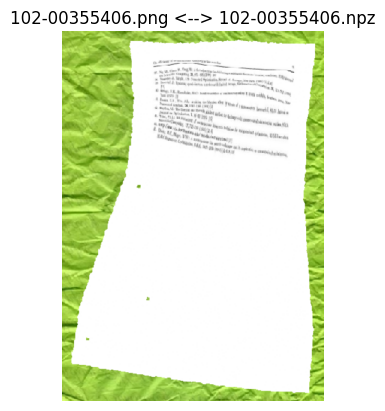

Label npz keys: ['x', 'y']
--------------------------------------------------
Image: 102-00972558.png <--> Label: 102-00972558.npz


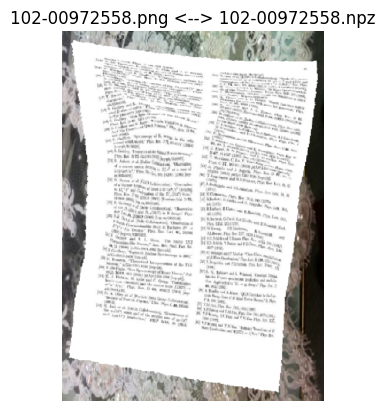

Label npz keys: ['x', 'y']
--------------------------------------------------


In [2]:
# Set your dataset paths
dataset_dir = "/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset"
image_dir = os.path.join(dataset_dir, "image")
label_dir = os.path.join(dataset_dir, "label")

# List all image and label files
image_files = sorted([f for f in os.listdir(image_dir) if f.lower().endswith('.png')])
label_files = sorted([f for f in os.listdir(label_dir) if f.lower().endswith('.npz')])

# Create a dict for quick label lookup
label_dict = {os.path.splitext(f)[0]: f for f in label_files}

# Pair images and labels by base filename
pairs = []
for img_file in image_files:
    base_name = os.path.splitext(img_file)[0]
    if base_name in label_dict:
        pairs.append((img_file, label_dict[base_name]))

# Show the first 5 pairs
for img_file, label_file in pairs[:5]:
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, label_file)
    print(f"Image: {img_file} <--> Label: {label_file}")
    # Display image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"{img_file} <--> {label_file}")
    plt.axis('off')
    plt.show()
    # Display label content (list keys in npz)
    with np.load(label_path) as data:
        print("Label npz keys:", list(data.keys()))
    print("-" * 50)

## cek isi npz

In [3]:
import numpy as np

with np.load('/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/label/1-d2a1c88c.npz') as data:
    print(data.files)  # List of keys
    for key in data.files:
        print(key, data[key].shape)

['x', 'y']
x (707, 500)
y (707, 500)


# preprocess docunet

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm  

def preprocess_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    
    # Resize the image to 512x512
    img = cv2.resize(img, (512, 512), interpolation=cv2.INTER_AREA)
    
    # Normalize the image to the range [0, 1]
    img = img.astype(np.float32) / 255.0
    
    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(np.uint8(img * 255)) / 255.0
    
    # Apply Gaussian blur
    img = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Apply Canny edge detection
    img = cv2.Canny(np.uint8(img * 255), 50, 150) / 255.0
    
    # Apply adaptive thresholding (convert to pure black and white)
    img = cv2.adaptiveThreshold(
        np.uint8(img * 255), 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )
    
    return img

# Set your source and destination directories
src_dir = "/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/image"
dst_dir = "/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed"

os.makedirs(dst_dir, exist_ok=True)

# List all the image files in the source directory
image_files = [f for f in os.listdir(src_dir) if f.lower().endswith('.png')]

# Process each image
for fname in tqdm(image_files, desc="Preprocessing images"):
    src_path = os.path.join(src_dir, fname)
    dst_path = os.path.join(dst_dir, fname)
    try:
        processed = preprocess_image(src_path)
        # Save the processed image as a uint8 PNG (black and white)
        cv2.imwrite(dst_path, processed)
    except Exception as e:
        print(f"Failed to process {fname}: {e}")

print("Preprocessing complete. Images saved to:", dst_dir)


Preprocessing images: 100%|██████████| 15072/15072 [14:56<00:00, 16.82it/s]  

Preprocessing complete. Images saved to: /Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed


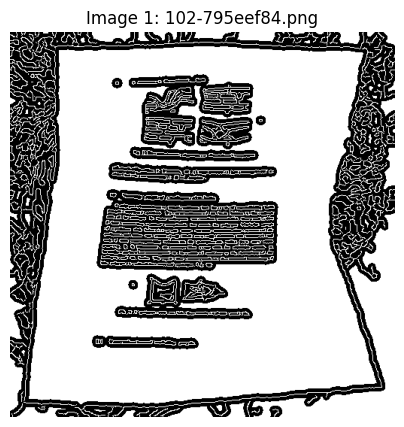

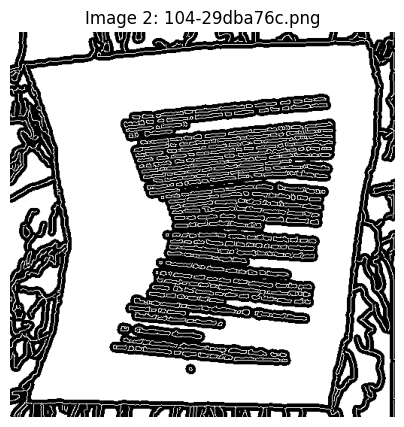

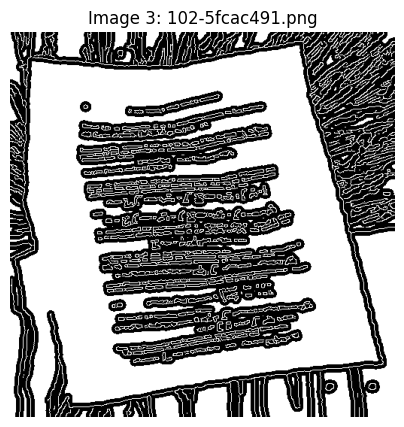

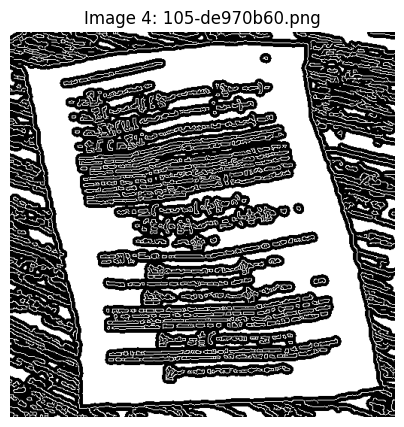

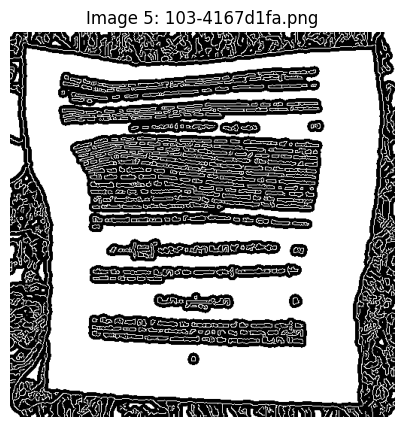

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the preprocessed images folder
image_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed'

# List all the image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith('.png')]  

# Display the first 5 images
for idx, image_file in enumerate(image_files[:5]):
    img_path = os.path.join(image_dir, image_file)
    
    # Load the image
    img = Image.open(img_path)
    
    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')  # Explicitly use the 'gray' colormap
    plt.title(f'Image {idx + 1}: {image_file}')
    plt.axis('off')  
    plt.show()

# pair preprocessed docunet & preprocessed labels

Label file: 1-d2a1c88c.npz, Available keys: ['x', 'y']


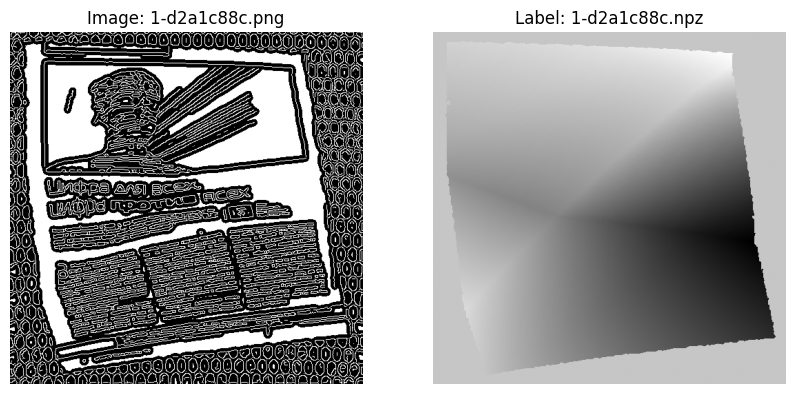

Label file: 10-0798ae97.npz, Available keys: ['x', 'y']


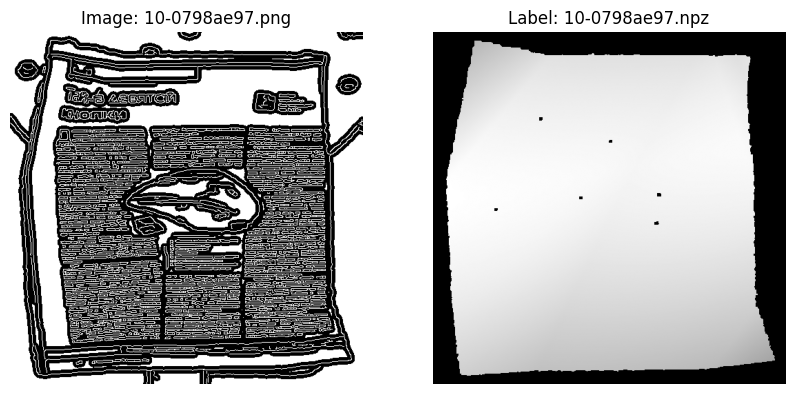

Label file: 102-0016eccf.npz, Available keys: ['x', 'y']


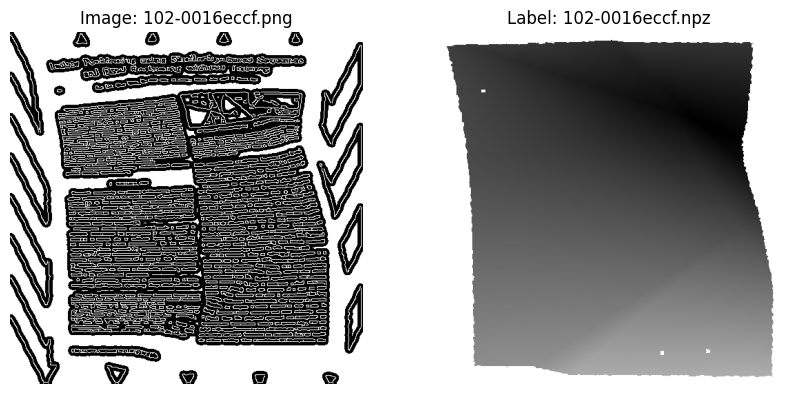

Label file: 102-00355406.npz, Available keys: ['x', 'y']


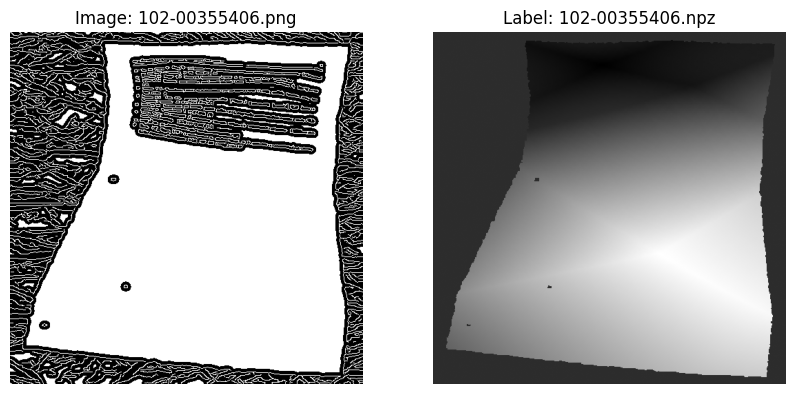

Label file: 102-00972558.npz, Available keys: ['x', 'y']


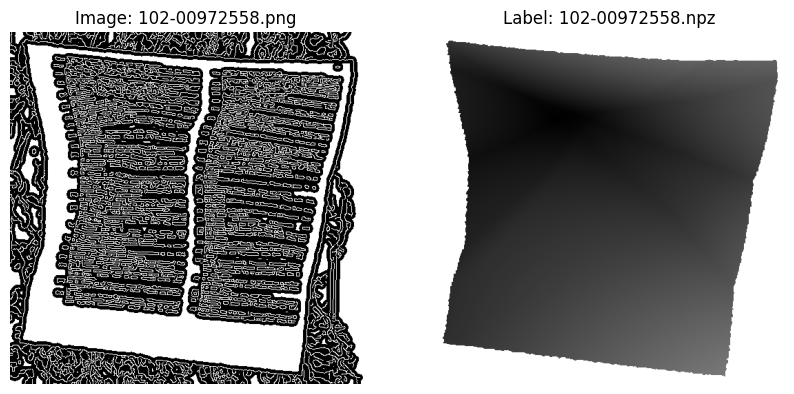

[('1-d2a1c88c.png', '1-d2a1c88c.npz'),
 ('10-0798ae97.png', '10-0798ae97.npz'),
 ('102-0016eccf.png', '102-0016eccf.npz'),
 ('102-00355406.png', '102-00355406.npz'),
 ('102-00972558.png', '102-00972558.npz'),
 ('102-00b38366.png', '102-00b38366.npz'),
 ('102-00d110ed.png', '102-00d110ed.npz'),
 ('102-00ead5fa.png', '102-00ead5fa.npz'),
 ('102-00fccbe5.png', '102-00fccbe5.npz'),
 ('102-0151ed35.png', '102-0151ed35.npz'),
 ('102-01a0656a.png', '102-01a0656a.npz'),
 ('102-01a8958f.png', '102-01a8958f.npz'),
 ('102-022daaf6.png', '102-022daaf6.npz'),
 ('102-024053df.png', '102-024053df.npz'),
 ('102-024f0386.png', '102-024f0386.npz'),
 ('102-02799495.png', '102-02799495.npz'),
 ('102-02d374a4.png', '102-02d374a4.npz'),
 ('102-031f28b9.png', '102-031f28b9.npz'),
 ('102-037d0bf1.png', '102-037d0bf1.npz'),
 ('102-03947db1.png', '102-03947db1.npz'),
 ('102-03a2acc2.png', '102-03a2acc2.npz'),
 ('102-040e1000.png', '102-040e1000.npz'),
 ('102-045aa48d.png', '102-045aa48d.npz'),
 ('102-04931821.p

In [14]:
preprocessed_image_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed'
label_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/label'

# List all the image files and label files
image_files = sorted([f for f in os.listdir(preprocessed_image_dir) if f.endswith('.png')]) 
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.npz')]) 

# Ensure there is a one-to-one correspondence between images and labels
image_label_pairs = list(zip(image_files, label_files))

# Display the first 5 pairs
for idx, (image_file, label_file) in enumerate(image_label_pairs[:5]):
    # Load the image
    image_path = os.path.join(preprocessed_image_dir, image_file)
    preprocessed_image = Image.open(image_path) 
    
    # Load the label (assuming it's stored as a .npz file, which can contain arrays)
    label_path = os.path.join(label_dir, label_file)
    label = np.load(label_path)

    # Print the available keys in the label file to inspect its structure
    print(f"Label file: {label_file}, Available keys: {list(label.keys())}")

    # Assuming the label has 'x' and 'y' keys
    label_x = label['x']
    label_y = label['y']

    # Resize the label arrays to match the size of the preprocessed image (512x512)
    resized_label_x = cv2.resize(label_x, (preprocessed_image.width, preprocessed_image.height), interpolation=cv2.INTER_NEAREST)
    resized_label_y = cv2.resize(label_y, (preprocessed_image.width, preprocessed_image.height), interpolation=cv2.INTER_NEAREST)

    # Display the image and the corresponding label
    plt.figure(figsize=(10, 5))
    
    # Image display with grayscale colormap
    plt.subplot(1, 2, 1)
    plt.imshow(preprocessed_image, cmap='gray')  
    plt.title(f'Image: {image_file}')
    plt.axis('off')

    # Label display with grayscale colormap
    plt.subplot(1, 2, 2)
    plt.imshow(resized_label_x, cmap='gray')  
    plt.title(f'Label: {label_file}')
    plt.axis('off')

    plt.show()

# Return the image-label pairs for further processing
image_label_pairs

# split docunet

In [15]:
import os
import random
import shutil
import numpy as np

# Define paths to the preprocessed images and labels
preprocessed_image_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed'
label_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/label'

# Custom paths for the training, testing, and validation preprocessed images
train_image_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train'
test_image_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/test'
val_image_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/val'

# List all the image files and label files
image_files = sorted([f for f in os.listdir(preprocessed_image_dir) if f.endswith('.png')]) 
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.npz')]) 

# Ensure there is a one-to-one correspondence between images and labels
image_label_pairs = list(zip(image_files, label_files))

# Shuffle the pairs to randomize the split
random.seed(42)  # For reproducibility
random.shuffle(image_label_pairs)

# Calculate the number of samples in each split
n_total = len(image_label_pairs)
n_train = int(0.7 * n_total)
n_test = int(0.15 * n_total)
n_val = n_total - n_train - n_test  # Ensures all data is used

# Split the data into training, testing, and validation sets
train_pairs = image_label_pairs[:n_train]
test_pairs = image_label_pairs[n_train:n_train + n_test]
val_pairs = image_label_pairs[n_train + n_test:]

# Print the split sizes
print(f"Total: {n_total}, Train: {len(train_pairs)}, Test: {len(test_pairs)}, Val: {len(val_pairs)}")

# Create directories for training, testing, and validation sets
output_dirs = [train_image_dir, test_image_dir, val_image_dir]
for output_dir in output_dirs:
    # Create directories for images and labels
    os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels'), exist_ok=True)

# Function to copy images and labels to the respective directories
def copy_samples(pairs, split, base_image_dir):
    for img_file, label_file in pairs:
        # Define paths for the preprocessed image and label
        img_path = os.path.join(base_image_dir, img_file)
        label_path = os.path.join(label_dir, label_file)

        # Define the destination paths
        img_dest_path = os.path.join(split, 'images', img_file)
        label_dest_path = os.path.join(split, 'labels', label_file)

        # Copy the files to the respective directories
        shutil.copy(img_path, img_dest_path)
        shutil.copy(label_path, label_dest_path)

# Copy the train, test, and validation samples
copy_samples(train_pairs, train_image_dir, preprocessed_image_dir)
copy_samples(test_pairs, test_image_dir, preprocessed_image_dir)
copy_samples(val_pairs, val_image_dir, preprocessed_image_dir)

print("Samples have been copied to respective directories.")

Total: 15068, Train: 10547, Test: 2260, Val: 2261
Samples have been copied to respective directories.
